In [2]:
!pip3 install sympy

     |████████████████████████████████| 5.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 512 kB 10.7 MB/s eta 0:00:01
  Created wheel for mpmath: filename=mpmath-1.1.0-py3-none-any.whl size=532239 sha256=893bdf4df85fef21318c1cc0daa93eb4f30c5ba79e462928af9e9c6b22fd5dc4
  Stored in directory: /Users/siddharthsachdeva/Library/Caches/pip/wheels/e2/46/78/e78f76c356bca9277368f1f97a31b37a8cb937176d9511af31
Successfully built mpmath


In [11]:
help(Symbol)

Help on class Symbol in module sympy.core.symbol:

class Symbol(sympy.core.expr.AtomicExpr, sympy.logic.boolalg.Boolean)
 |  Symbol(name, **assumptions)
 |  
 |  Assumptions:
 |     commutative = True
 |  
 |  You can override the default assumptions in the constructor:
 |  
 |  >>> from sympy import symbols
 |  >>> A,B = symbols('A,B', commutative = False)
 |  >>> bool(A*B != B*A)
 |  True
 |  >>> bool(A*B*2 == 2*A*B) == True # multiplication by scalars is commutative
 |  True
 |  
 |  Method resolution order:
 |      Symbol
 |      sympy.core.expr.AtomicExpr
 |      sympy.core.basic.Atom
 |      sympy.core.expr.Expr
 |      sympy.logic.boolalg.Boolean
 |      sympy.core.basic.Basic
 |      sympy.core.evalf.EvalfMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |  
 |  __getstate__(self)
 |  
 |  __new_stage2__(cls, name, **assumptions)
 |  
 |  as_dummy(self)
 |      Return the expression with any objects having structurally
 |      bound sym

In [50]:
from sympy import *
init_printing()

t = Symbol('t')
nch, npa, na = symbols('N_CH N_PA N_A', cls = Function, Function = True)
nch,npa, na, t

(N_CH, N_PA, N_A, t)

In [69]:
mu_ch = Symbol('u_CH', constant=True)
mu_pa = Symbol('u_PA', constant=True)
mu_a = Symbol('u_A', constant=True)
v_ch = Symbol('v_CH', constant=True)
v_pa = Symbol('v_PA', constant=True)
In = Symbol('I_re', constant=True)
Ex = Symbol('E_re', constant=True)

print('constants')
[mu_ch, mu_pa, mu_a, v_ch, v_pa, In, Ex]

constants


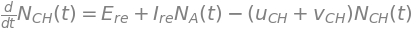

In [177]:
diffeq1 = Eq(nch(t).diff(t),  In*na(t) + Ex -(mu_ch+v_ch)*nch(t))
diffeq1

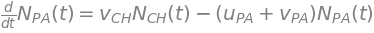

In [178]:
diffeq2 = Eq(npa(t).diff(t), v_ch*nch(t) - (mu_pa+v_pa)*npa(t))
diffeq2

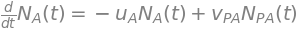

In [179]:
diffeq3 = Eq(na(t).diff(t), v_pa*npa(t) - (mu_a)*na(t))
diffeq3

## Approach 1: Try to solve automatically

In [73]:
help(dsolve)

Help on function dsolve in module sympy.solvers.ode.ode:

dsolve(eq, func=None, hint='default', simplify=True, ics=None, xi=None, eta=None, x0=0, n=6, **kwargs)
     Solves any (supported) kind of ordinary differential equation and
     system of ordinary differential equations.
    
     For single ordinary differential equation
    
     It is classified under this when number of equation in ``eq`` is one.
     **Usage**
    
         ``dsolve(eq, f(x), hint)`` -> Solve ordinary differential equation
         ``eq`` for function ``f(x)``, using method ``hint``.
    
     **Details**
    
         ``eq`` can be any supported ordinary differential equation (see the
             :py:mod:`~sympy.solvers.ode` docstring for supported methods).
             This can either be an :py:class:`~sympy.core.relational.Equality`,
             or an expression, which is assumed to be equal to ``0``.
    
         ``f(x)`` is a function of one variable whose derivatives in that
             variable

In [81]:
system = [diffeq1, diffeq2, diffeq3]
dsolve(system, (nch(t), npa(t), na(t)), hint='all_Integral')

KeyboardInterrupt: 

### the kernel pooped, and my computer froze, so guess you're not on my level sympy

## Approach 2: Solve by elimination

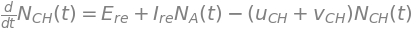

In [180]:
diffeq1

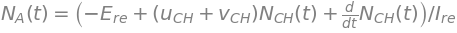

In [181]:
solvefora = Eq(na(t), solve(diffeq1, na(t))[0])
solvefora = Eq(na(t), collect(solvefora.rhs, nch(t)))
solvefora

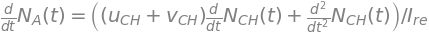

In [182]:
solveforadiff = Eq(solvefora.lhs.diff(t), solvefora.rhs.diff(t))
solveforadiff

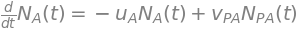

In [183]:
diffeq3

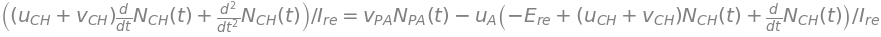

In [184]:
eq3_eliminate_a = Eq(
    diffeq3.lhs.subs(na(t).diff(t), solveforadiff.rhs),
    diffeq3.rhs.subs(na(t), solvefora.rhs)
)
eq3_eliminate_a

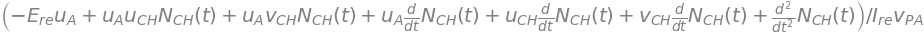

In [185]:
solveforpa = solve(eq3_eliminate_a, npa(t))[0]
solveforpa

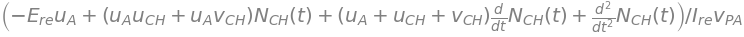

In [186]:
solveforpa = collect(solveforpa, nch(t))
solveforpa

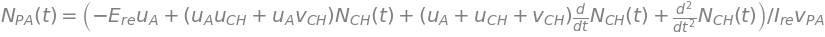

In [187]:
eq3_eliminate_a = Eq(npa(t), solveforpa)
eq3_eliminate_a

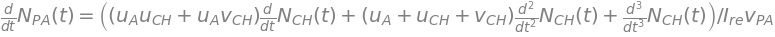

In [188]:
eq3_eliminate_a_diff = Eq(eq3_eliminate_a.lhs.diff(t), eq3_eliminate_a.rhs.diff(t))
eq3_eliminate_a_diff

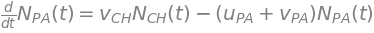

In [189]:
diffeq2

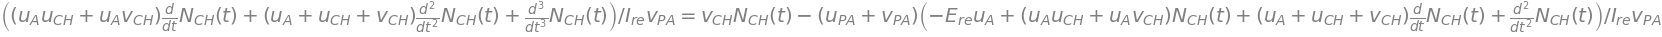

In [190]:
diffeq2_eliminate_pa = Eq(
    diffeq2.lhs.subs(npa(t).diff(t), eq3_eliminate_a_diff.rhs),
    diffeq2.rhs.subs(npa(t), eq3_eliminate_a.rhs)
)
diffeq2_eliminate_pa

### Now, we've converted a system of 3 linear differential equation to a single differential equation of order 3

In [193]:
elimination_solution = dsolve(diffeq2_eliminate_pa)

In [427]:
elimination_solution = simplify(elimination_solution)

KeyboardInterrupt: 

In [428]:
str(elimination_solution)

'Eq(N_CH(t), C1*exp(t*(u_A*u_CH/(-27*I_re*v_CH*v_PA/2 - 9*u_A**2*u_CH/2 - 9*u_A**2*u_PA/2 - 9*u_A**2*v_CH/2 - 9*u_A**2*v_PA/2 - 9*u_A*u_CH**2/2 - 9*u_A*u_CH*v_CH - 9*u_A*u_PA**2/2 - 9*u_A*u_PA*v_PA - 9*u_A*v_CH**2/2 - 9*u_A*v_PA**2/2 - 9*u_CH**2*u_PA/2 - 9*u_CH**2*v_PA/2 - 9*u_CH*u_PA**2/2 - 9*u_CH*u_PA*v_CH - 9*u_CH*u_PA*v_PA - 9*u_CH*v_CH*v_PA - 9*u_CH*v_PA**2/2 - 9*u_PA**2*v_CH/2 - 9*u_PA*v_CH**2/2 - 9*u_PA*v_CH*v_PA - 9*v_CH**2*v_PA/2 - 9*v_CH*v_PA**2/2 + sqrt(-4*(-3*u_A*u_CH - 3*u_A*u_PA - 3*u_A*v_CH - 3*u_A*v_PA - 3*u_CH*u_PA - 3*u_CH*v_PA - 3*u_PA*v_CH - 3*v_CH*v_PA + (u_A + u_CH + u_PA + v_CH + v_PA)**2)**3 + (-27*I_re*v_CH*v_PA - 9*u_A**2*u_CH - 9*u_A**2*u_PA - 9*u_A**2*v_CH - 9*u_A**2*v_PA - 9*u_A*u_CH**2 - 18*u_A*u_CH*v_CH - 9*u_A*u_PA**2 - 18*u_A*u_PA*v_PA - 9*u_A*v_CH**2 - 9*u_A*v_PA**2 - 9*u_CH**2*u_PA - 9*u_CH**2*v_PA - 9*u_CH*u_PA**2 - 18*u_CH*u_PA*v_CH - 18*u_CH*u_PA*v_PA - 18*u_CH*v_CH*v_PA - 9*u_CH*v_PA**2 - 9*u_PA**2*v_CH - 9*u_PA*v_CH**2 - 18*u_PA*v_CH*v_PA - 9*v_C

In [429]:
len(str(elimination_solution))

### Wow, this is wayyyy too messy. Let's see if another method can simplify it.i literally had to print the code for this because the latex overwhelmed my memory. This works, but let's see if one of the other options gives us something similar. 

In [ ]:
checkodesol(diffeq2_eliminate_pa, elimination_solution)

## Approach 3: Solve with Eigenvalues and Eigenvectors

#### init non-function symbols to get matrix

In [409]:
n_ch, n_pa, n_a = symbols('N_CH N_PA N_A')

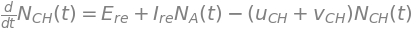

In [410]:
diffeq1

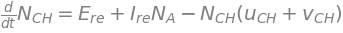

In [411]:
diffeq1_nofn = diffeq1.subs(nch(t), n_ch).subs(na(t), n_a)
diffeq1_nofn

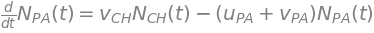

In [412]:
diffeq2

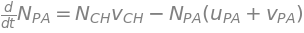

In [413]:
diffeq2_nofn = diffeq2.subs(nch(t), n_ch).subs(npa(t), n_pa)
diffeq2_nofn

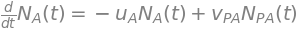

In [414]:
diffeq3

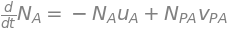

In [415]:
diffeq3_nofn = diffeq3.subs(npa(t), n_pa).subs(na(t), n_a)
diffeq3_nofn

In [416]:
A, b = linear_eq_to_matrix(
    [diffeq1_nofn.rhs, diffeq2_nofn.rhs, diffeq3_nofn.rhs], [n_ch, n_pa, n_a])
A

⎡-(u_CH + v_CH)        0         Iᵣₑ ⎤
⎢                                    ⎥
⎢     v_CH       -(u_PA + v_PA)   0  ⎥
⎢                                    ⎥
⎣      0              v_PA       -u_A⎦

In [417]:
b

⎡-Eᵣₑ⎤
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎣ 0  ⎦

## Time to find the eigenvalues and eigenvectors

In [418]:
eigenvallist = list(eigenvals.keys())
eigenval1 = eigenvallist[0]
eigenval2 = eigenvallist[1]
eigenval3 = eigenvallist[2]

In [419]:
eigenval1 = eigenvallist[0]
eigenval2 = eigenvallist[1]
eigenval3 = eigenvallist[2]

### All eigenvals have multiplicity 1

### Found 1 real eigenvalue

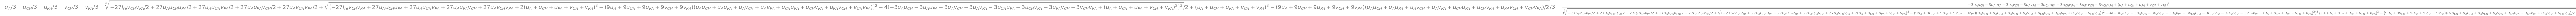

In [422]:
collect(eigenval1, 1/3)

False


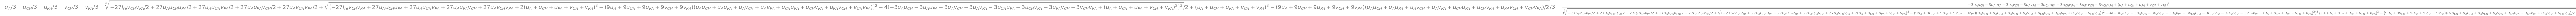

In [420]:
print(eigenval1.has(I))
eigenval1

### And 2 complex eigenvalues

True


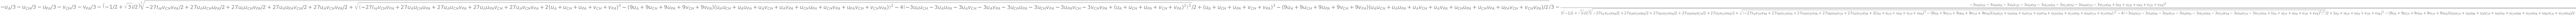

In [424]:
print(eigenval2.has(I))
eigenval2

True


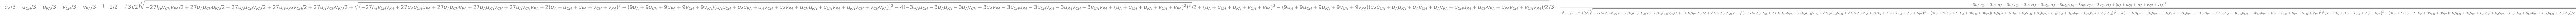

In [262]:
print(eigenval3.has(I))
eigenval3

### All eigenvals have multiplicity 1

In [327]:
eigenvalue = Symbol('lamda', constant=True)
eigenvalue

### The eigenvectors are in the nullspace of lambda*I - A

In [ ]:
eigenvec1 = ((eigenval1 * eye(3)) - A).nullspace()

In [ ]:
eigenvec2 = ((eigenval2 * eye(3)) - A).nullspace()

In [ ]:
eigenvec3 = ((eigenval3 * eye(3)) - A).nullspace()

### Automatic

In [423]:
eigenvalsvects = A.eigenvects()

AttributeError: 'dict' object has no attribute 'is_Integer'

### Wow, every eigenvector solver method broke given the complexity of this solution, it might be possible that this system doesn't have an analytical solution